In [1]:
import seaborn as sns
from pathlib import Path
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize and import channel images

In [2]:
#info about directory
print(f"Current directory: {Path.cwd()}")
print(f"Home directory: {Path.home()}")

Current directory: /Users/anna/Documents/PhD/CalcificationImaging/ImageAnalysis
Home directory: /Users/anna


In [3]:
##importing 3 seperate channel images into dataframe


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/INS3001_03/20x_tiff/")#direct to image dir
img_dir = Path('')

img_df = pd.DataFrame({'path': list(img_dir.glob('C3*.tif'))})#3 channel fluorescence image split 
#into 3 seperate tif files, C1-channel1; filenameparts seperated by '-';
img_df['base'] = img_df['path'].map(lambda c_path: c_path.as_posix())#convert path to string
img_df['exp_num'] =img_df['base'].apply(lambda base:base.split('-')[1][:-5])#experiment code of lif file
img_df['cond'] =img_df['base'].apply(lambda base:base.split('-')[2])#sample condition
img_df['Brightfield'] = img_df['path'].map(
        lambda c_path: imread(c_path))#read in channel 1

img_df['Hoechst'] = img_df['cond'].apply(lambda cond: imread('C4-20200301_CaP_INS3001_Exp03_20x.lif -{}'.format(cond)))#read in Hoechst channel 
img_df['CellMask'] = img_df['cond'].apply(lambda cond: imread('C5-20200301_CaP_INS3001_Exp03_20x.lif -{}'.format(cond)))#read in CellMaSK channel 
img_df['EthD'] = img_df['cond'].apply(lambda cond: imread('C2-20200301_CaP_INS3001_Exp03_20x.lif -{}'.format(cond)))#read in EthD channel
img_df['Calcein'] = img_df['cond'].apply(lambda cond: imread('C1-20200301_CaP_INS3001_Exp03_20x.lif -{}'.format(cond)))#read in Hoechst channel #read in EthD channel

# !! adapt cond_short dependending on cond: check head of df if correct

In [77]:
img_df['exp_num'].iloc[0]

'20200301_CaP_INS3001_Exp03_20x'

In [78]:
##sort dataframe by condition column
img_df['cond_short']=img_df['cond'].apply(lambda str:str[1:4])
#img_df['cond_short']=img_df['cond'].apply(lambda str:str[5:8])
img_df.sort_values(by='cond',axis=0,inplace=True)
img_df.reset_index(inplace=True)
img_df.head()

,index,path,base,exp_num,cond,Brightfield,Hoechst,CellMask,EthD,Calcein,cond_short
0,42,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,20200301_CaP_INS3001_Exp03_20x,c00_w1_01.tif,"[[19, 19, 20, 20, 18, 19, 18, 19, 20, 20, 20, ...","[[8, 9, 6, 7, 7, 8, 5, 6, 7, 9, 8, 9, 9, 9, 10...","[[15, 15, 15, 16, 16, 18, 16, 14, 14, 15, 14, ...","[[2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,...","[[5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 6, 4,...",c00
1,44,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,20200301_CaP_INS3001_Exp03_20x,c00_w1_02.tif,"[[20, 23, 22, 21, 20, 21, 21, 18, 16, 17, 21, ...","[[6, 6, 7, 5, 6, 6, 7, 7, 6, 7, 6, 8, 6, 8, 7,...","[[14, 15, 11, 13, 14, 14, 15, 15, 17, 16, 16, ...","[[2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 3, 3, 4, 4, 5,...","[[30, 35, 37, 36, 39, 39, 45, 49, 49, 48, 55, ...",c00
2,47,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w1...,20200301_CaP_INS3001_Exp03_20x,c00_w1_03.tif,"[[21, 21, 22, 24, 23, 23, 21, 22, 24, 27, 27, ...","[[14, 13, 12, 12, 12, 15, 12, 11, 10, 8, 9, 8,...","[[10, 11, 12, 11, 9, 12, 13, 13, 11, 10, 12, 1...","[[2, 2, 3, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 3, 2,...","[[6, 7, 4, 5, 7, 7, 9, 10, 13, 14, 15, 14, 11,...",c00
3,21,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w2...,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w2...,20200301_CaP_INS3001_Exp03_20x,c00_w2_01.tif,"[[24, 25, 26, 25, 23, 22, 23, 22, 23, 22, 23, ...","[[11, 11, 11, 12, 13, 14, 12, 14, 14, 12, 14, ...","[[29, 28, 30, 28, 32, 28, 27, 25, 25, 24, 23, ...","[[5, 5, 5, 6, 5, 6, 4, 4, 3, 4, 4, 4, 4, 4, 3,...","[[30, 33, 31, 30, 27, 25, 21, 17, 15, 16, 14, ...",c00
4,26,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w2...,C3-20200301_CaP_INS3001_Exp03_20x.lif - c00_w2...,20200301_CaP_INS3001_Exp03_20x,c00_w2_02.tif,"[[26, 23, 24, 25, 25, 24, 25, 26, 24, 25, 25, ...","[[55, 56, 54, 58, 60, 60, 58, 55, 60, 56, 58, ...","[[19, 19, 21, 18, 18, 19, 17, 17, 21, 19, 18, ...","[[4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 5,...","[[6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 2, 4, 4,...",c00


# Hoechst: count cells

In [79]:
##Hoechst: binarize

from skimage.filters import threshold_triangle

img_df['hoechst_bw']="" #new column in dataframe for bw img
img_df['t_hoechst']="" #new column for chosen threshold

for img, (idx,_) in zip(img_df['Hoechst'], img_df.iterrows()):  
    t=threshold_triangle(img)
    img_df['hoechst_bw'].iloc[idx]=img>t
    img_df['t_hoechst'].iloc[idx]=t

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [80]:
##Hoechst segmentation and count v2-optimized

from skimage.filters import threshold_local, median
from skimage.morphology import binary_erosion,disk,watershed,dilation
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

img_df['local_maxi']=''

#prepare seeds from Hoechst channel
img_df['distance']=img_df['hoechst_bw'].apply(lambda hoechst_bw:ndi.distance_transform_edt(hoechst_bw))

for (idx,_) in img_df.iterrows():
    img_df['local_maxi'].iloc[idx]=peak_local_max(img_df['distance'].iloc[idx], indices=False, footprint=np.ones((30,30)),
                                                  labels=img_df['hoechst_bw'].iloc[idx])
img_df['local_maxi_extend']=img_df['local_maxi'].apply(lambda maxi: dilation(maxi,disk(3)))
img_df['hoechst_seeds']=img_df['local_maxi_extend'].apply(lambda maxi:ndi.label(maxi)[0]) #extend local maxima to 
#avoid two seeds very close together

#watershed
img_df['hoechst_labels']=''
img_df['hoechst_line']=''


for (idx,_) in img_df.iterrows():
    img_df['hoechst_labels'].iloc[idx]=watershed(-img_df['distance'].iloc[idx],img_df['hoechst_seeds'].iloc[idx],
                                                 mask=img_df['hoechst_bw'].iloc[idx],
                                                 watershed_line=True,compactness=200)
    #high compactness makes nuclei in cluster more uniform
    img_df['hoechst_line'].iloc[idx]=img_df['hoechst_labels'].iloc[idx]==0

    #count    
img_df['nuclei_count']=img_df['hoechst_labels'].apply(lambda labels:np.amax(labels))




# EthD - count dead cells

In [81]:
## EthD binarize

img_df['EthD_99']=img_df['EthD'].apply(lambda int: np.percentile(int,99))

t=60 #lower fixed threshold
img_df['ethd_mask']=''
img_df['ethd_mask_f']=''

for (idx,_) in img_df.iterrows():
    img_df['ethd_mask'].iloc[idx]=img_df['EthD'].iloc[idx]>img_df['EthD_99'].iloc[idx]
    img_df['ethd_mask_f'].iloc[idx]=img_df['ethd_mask'].iloc[idx]*img_df['EthD'].iloc[idx]

img_df['ethd_mask_bw']=img_df['ethd_mask_f'].apply(lambda img: img>t) #lower fixed threshold



In [87]:
## EthD-watershed to seperate touching objects
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops

Tarea=20 #filter for small noise
img_df['ethd_distance']=img_df['ethd_mask_bw'].apply(lambda mask: ndi.distance_transform_edt(mask))
#greyscale distance or binary distance?

img_df['ethd_local_maxi']=''
img_df['ethd_labels']=''
img_df['ethd_areas']=np.empty((len(img_df), 0)).tolist()
img_df['ethd_areasFilter']=np.empty((len(img_df), 0)).tolist()
img_df['ethd_props']=''
img_df['ethd_count']=''

for (idx,_) in img_df.iterrows():
    img_df['ethd_local_maxi'].iloc[idx]=peak_local_max(img_df['ethd_distance'].iloc[idx],indices=False,
                                                  footprint=np.ones((20,20)),labels=img_df['ethd_mask_bw'].iloc[idx])

img_df['ethd_maxi_extend']=img_df['ethd_local_maxi'].apply(lambda maxi: dilation(maxi,disk(5)))
img_df['ethd_seeds']=img_df['ethd_local_maxi'].apply(lambda maxi:ndi.label(maxi)[0]) #extend local maxima to 
#avoid two seeds very close together



for (idx,_) in img_df.iterrows():
    img_df['ethd_labels'].iloc[idx]=watershed(-img_df['ethd_distance'].iloc[idx],img_df['ethd_seeds'].iloc[idx],\
                                         mask=img_df['ethd_mask_bw'].iloc[idx])
    img_df['ethd_props'].iloc[idx]=regionprops(img_df['ethd_labels'].iloc[idx])
    for p in img_df['ethd_props'].iloc[idx]:
        img_df['ethd_areas'].iloc[idx].append(p.area)

    img_df['ethd_areasFilter'].iloc[idx]=(list(filter(lambda ele:ele>Tarea, img_df['ethd_areas'].iloc[idx]))) #upper threshold for patch area
    img_df['ethd_count'].iloc[idx]=len(img_df['ethd_areasFilter'].iloc[idx])



# cellmask channel - single cell segmentation

In [88]:
##adaptive thresholding of cellmask channel
from skimage.morphology import medial_axis

block_size = 35
img_df['adaptiveT']=img_df['CellMask'].apply(lambda cellmask:threshold_local(cellmask, block_size))


img_df['cellmask_adp']=''

for (idx,_) in img_df.iterrows():
    
    img_df['cellmask_adp'].iloc[idx]=img_df['CellMask'].iloc[idx]> img_df['adaptiveT'].iloc[idx] 
#median filtering and erosion of thresholded cellmask img
img_df['cellmask_med']=img_df['cellmask_adp'].apply(lambda cellmask_adp: median(cellmask_adp,disk(5)))
img_df['cellmask_eros']=img_df['cellmask_med'].apply(lambda cellmask_med:binary_erosion(cellmask_med))

img_df['cellmask_skeleton']=img_df['cellmask_eros'].apply(lambda img:medial_axis(img))
img_df['distance_eros']=img_df['cellmask_eros'].apply(lambda img:ndi.distance_transform_edt(img))



In [89]:
##cellmask-watershed (alternative 1): distance of binary erosion of cellmask; seeds of Hoechst channel
img_df['cellmask_labels']=''
img_df['cellmask_line']=''

for (idx,_) in img_df.iterrows():
    img_df['cellmask_labels'].iloc[idx]=watershed(img_df['distance_eros'].iloc[idx],
                                                  img_df['hoechst_seeds'].iloc[idx], watershed_line=True)
    img_df['cellmask_line'].iloc[idx]=img_df['cellmask_labels'].iloc[idx]==0

## correlation between calcein and cellmask channels

In [90]:
##compute ssim and difference image
from skimage.measure import compare_ssim

img_df['ssim_cm']=''
img_df['grad_cm']=''

for (idx,_) in img_df.iterrows():
    img_df['ssim_cm'].iloc[idx],img_df['grad_cm'].iloc[idx]=compare_ssim(img_df['Calcein'].iloc[idx],
                                                               img_df['CellMask'].iloc[idx],gradient=True)
   

# single cell feature extraction

In [91]:
##new dataframe for single cell features
singleCell_df=pd.DataFrame({'exp':img_df['exp_num'],'cond':img_df['cond'], 'cond_short':img_df['cond_short'],'CellMask':
                            img_df['CellMask'],'cellmask_labels':img_df['cellmask_labels'], 'Calcein':img_df['Calcein'],
                            'Hoechst':img_df['Hoechst'], 'hoechst_labels':img_df['hoechst_labels']})
                               


In [92]:
##extraxt features for single cells
from skimage.measure import regionprops

#add: totalcell and dead cell count
singleCell_df['nuclei_count']=img_df['nuclei_count']
singleCell_df['ethd_count']=img_df['ethd_count']


#single cell features of cellmask channel: shape and intensity
singleCell_df['props']=''
singleCell_df['areas']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['major_axis_length']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['eccentricity']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['eulernumber']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['extent']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['maxint']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['meanint']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['minint']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['perimeter']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['solidity']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['inertiatensor']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['major_axis_length']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['minor_axis_length']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['bbox']=np.empty((len(singleCell_df), 0)).tolist()



for (idx,_) in img_df.iterrows():
    singleCell_df['props'].iloc[idx]=regionprops(singleCell_df['cellmask_labels'].iloc[idx],singleCell_df['CellMask'].iloc[idx])
    for p in singleCell_df['props'].iloc[idx]:
        singleCell_df['areas'].iloc[idx].append(p.area)
        singleCell_df['eccentricity'].iloc[idx].append(p.eccentricity)
        singleCell_df['eulernumber'].iloc[idx].append(p.euler_number)
        singleCell_df['extent'].iloc[idx].append(p.extent)
        singleCell_df['maxint'].iloc[idx].append(p.max_intensity)
        singleCell_df['meanint'].iloc[idx].append(p.mean_intensity)
        singleCell_df['minint'].iloc[idx].append(p.min_intensity)
        singleCell_df['perimeter'].iloc[idx].append(p.perimeter)
        singleCell_df['solidity'].iloc[idx].append(p.solidity)
        singleCell_df['inertiatensor'].iloc[idx].append(p.inertia_tensor_eigvals)
        singleCell_df['major_axis_length'].iloc[idx].append(p.major_axis_length)
        singleCell_df['minor_axis_length'].iloc[idx].append(p.minor_axis_length)
        singleCell_df['bbox'].iloc[idx].append(p.bbox)
       

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [93]:
#single cell features of hoechst channel: shape 
singleCell_df['props_hoechst']=''
singleCell_df['areas_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['major_axis_length_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['eccentricity_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['eulernumber_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['extent_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['perimeter_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['solidity_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['inertiatensor_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['major_axis_length_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['minor_axis_length_hoechst']=np.empty((len(singleCell_df), 0)).tolist()
singleCell_df['bbox_hoechst']=np.empty((len(singleCell_df), 0)).tolist()

for (idx,_) in img_df.iterrows():
    singleCell_df['props_hoechst'].iloc[idx]=regionprops(singleCell_df['hoechst_labels'].iloc[idx])
    for p in singleCell_df['props_hoechst'].iloc[idx]:
        singleCell_df['areas_hoechst'].iloc[idx].append(p.area)
        singleCell_df['eccentricity_hoechst'].iloc[idx].append(p.eccentricity)
        singleCell_df['eulernumber_hoechst'].iloc[idx].append(p.euler_number)
        singleCell_df['extent_hoechst'].iloc[idx].append(p.extent)
        singleCell_df['perimeter_hoechst'].iloc[idx].append(p.perimeter)
        singleCell_df['solidity_hoechst'].iloc[idx].append(p.solidity)
        singleCell_df['inertiatensor_hoechst'].iloc[idx].append(p.inertia_tensor_eigvals)
        singleCell_df['major_axis_length_hoechst'].iloc[idx].append(p.major_axis_length)
        #singleCell_df['minor_axis_length_hoechst'].iloc[idx].append(p.minor_axis_length)
        #singleCell_df['bbox_hoechst'].iloc[idx].append(p.bbox)




In [94]:
## new df for median feature vectors
singleCellMedian_df=''
singleCellMedian_df=singleCell_df.copy()

singleCellMedian_df.drop(['exp','cond_short','CellMask','cellmask_labels', 'Calcein', 'Hoechst', 'hoechst_labels', 
                       'props','props_hoechst','bbox','inertiatensor','inertiatensor_hoechst'],axis=1,inplace=True)
singleCellMedian_df.set_index('cond',inplace=True)




In [95]:
##median values/img of features
for (c,_) in singleCellMedian_df.iteritems():
    singleCellMedian_df[c]=singleCellMedian_df[c].apply(lambda x: np.median(x))



/Users/anna/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


# calcein binarize and patch features

In [96]:
## calcein channel features - binarize and total area
from skimage.measure import label
from skimage.color import label2rgb

img_df['calcein_bw']="" #new column in dataframe for bw img
img_df['calcein_threshold']="" #new column for chosen threshold

##set threshold for each individual image based on triangle thresholding
for img, (idx,_) in zip(img_df['Calcein'], img_df.iterrows()):  
    t=threshold_triangle(img)
    img_df['calcein_threshold'].iloc[idx]=t
    
## upper threshold limit: if higher than min in ctrl cond-set to min
minT_c00=img_df[img_df['cond_short']=='c00']['calcein_threshold'].min()
img_df['calcein_threshold']=img_df['calcein_threshold'].apply(lambda t: minT_c00 if t>minT_c00 else t)

#binarize calcein channel image based on threshold
for img, (idx,_) in zip(img_df['Calcein'], img_df.iterrows()):  
    img_df['calcein_bw'].iloc[idx]=img>img_df['calcein_threshold'].iloc[idx]
    

img_df['calcein_area']=img_df['calcein_bw'].apply(lambda bw:bw.sum())#calculate total CaP area with sum of True px
img_df['calcein_label']=img_df['calcein_bw'].apply(lambda x: label(x)) #label connected CaP patches
img_df['calcein_count']=img_df['calcein_label'].apply(lambda x: np.amax(x))


!!quick check of effects of defining upper threshold

Text(0, 0.5, 'CaP area (pixel)')

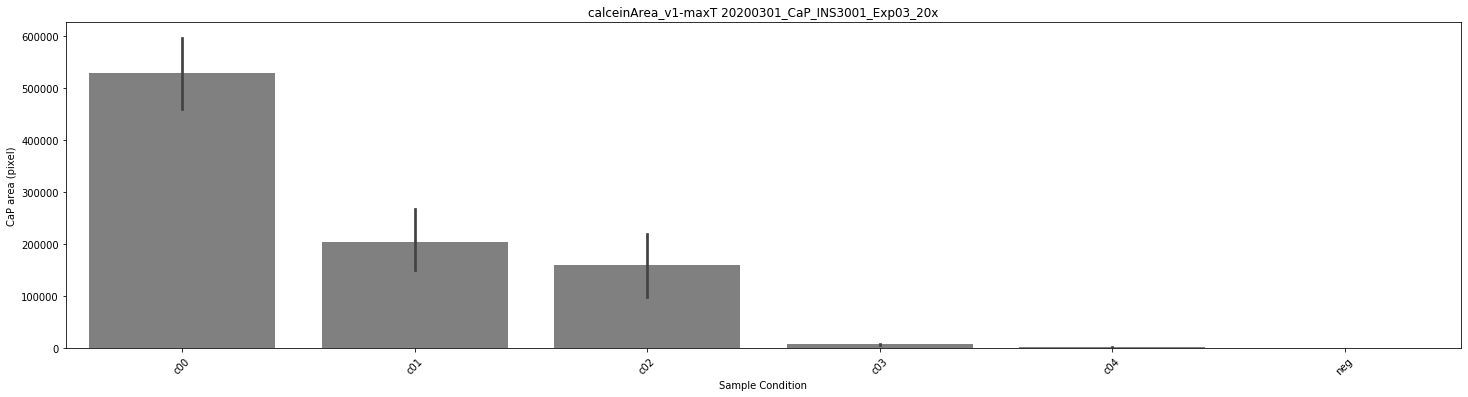

In [97]:
##plot:bw area with max threshold
rcGraph = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True}
plt.rcParams.update(rcGraph)

plt.figure(figsize=(25, 6))
plt.tight_layout()
fig=sns.barplot(x='cond_short',y='calcein_area',data=img_df,color='gray')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.set_title('calceinArea_v1-maxT {}'.format(img_df['exp_num'].iloc[0]))
fig.set_xlabel('Sample Condition')
fig.set_ylabel('CaP area (pixel)')



In [98]:
##calcein single patch features dataframe

singleCalceinPatch_df=pd.DataFrame({'cond':img_df['cond'], 'exp':img_df['exp_num'], 'calcein_label':
                                    img_df['calcein_label'],'calcein': img_df['Calcein']})

In [99]:
##calcein single patch features dataframe: shape and intensity 
singleCalceinPatch_df['props_calcein']=''
singleCalceinPatch_df['areas_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['eccentricity_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['eulernumber_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['extent_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['perimeter_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['solidity_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['inertiatensor_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['major_axis_length_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['minor_axis_length_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['bbox_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['min_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['max_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()
singleCalceinPatch_df['mean_calcein']=np.empty((len(singleCalceinPatch_df), 0)).tolist()

for (idx,_) in img_df.iterrows():
    singleCalceinPatch_df['props_calcein'].iloc[idx]=regionprops(singleCalceinPatch_df['calcein_label'].iloc[idx],
                                                                 singleCalceinPatch_df['calcein'].iloc[idx])
    for p in singleCalceinPatch_df['props_calcein'].iloc[idx]:
        singleCalceinPatch_df['areas_calcein'].iloc[idx].append(p.area)
        singleCalceinPatch_df['eccentricity_calcein'].iloc[idx].append(p.eccentricity)
        singleCalceinPatch_df['eulernumber_calcein'].iloc[idx].append(p.euler_number)
        singleCalceinPatch_df['extent_calcein'].iloc[idx].append(p.extent)
        singleCalceinPatch_df['perimeter_calcein'].iloc[idx].append(p.perimeter)
        singleCalceinPatch_df['solidity_calcein'].iloc[idx].append(p.solidity)
        singleCalceinPatch_df['inertiatensor_calcein'].iloc[idx].append(p.inertia_tensor_eigvals)
        singleCalceinPatch_df['major_axis_length_calcein'].iloc[idx].append(p.major_axis_length)
        singleCalceinPatch_df['minor_axis_length_calcein'].iloc[idx].append(p.minor_axis_length)
        singleCalceinPatch_df['bbox_calcein'].iloc[idx].append(p.bbox)
        singleCalceinPatch_df['max_calcein'].iloc[idx].append(p.max_intensity)
        singleCalceinPatch_df['min_calcein'].iloc[idx].append(p.mean_intensity)
        singleCalceinPatch_df['mean_calcein'].iloc[idx].append(p.min_intensity)


In [100]:
##median values of calcein patch properties
singleCalceinPatch_df['areas_calcein_median']=singleCalceinPatch_df['areas_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['eccentricity_calcein_median']=singleCalceinPatch_df['eccentricity_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['eulernumber_calcein_median']=singleCalceinPatch_df['eulernumber_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['extent_calcein_median']=singleCalceinPatch_df['extent_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['perimeter_calcein_median']=singleCalceinPatch_df['perimeter_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['solidity_calcein_median']=singleCalceinPatch_df['solidity_calcein'].apply(lambda x:np.median(x))
#singleCalceinPatch_df['inertiatensor_calcein_median']=singleCalceinPatch_df['inertiatensor_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['majoraxislength_calcein_median']=singleCalceinPatch_df['major_axis_length_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['minoraxislength_calcein_median']=singleCalceinPatch_df['minor_axis_length_calcein'].apply(lambda x:np.median(x))
#singleCalceinPatch_df['bbox_calcein_median']=singleCalceinPatch_df['bbox_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['max_calcein_median']=singleCalceinPatch_df['max_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['min_calcein_median']=singleCalceinPatch_df['min_calcein'].apply(lambda x:np.median(x))
singleCalceinPatch_df['mean_calcein_median']=singleCalceinPatch_df['mean_calcein'].apply(lambda x:np.median(x))



# calcein whole image features and median features/patch

In [101]:
## whole image properties 

#new dataframe for whole image features
imgProps_df=pd.DataFrame({'exp':img_df['exp_num'],'cond':img_df['cond'], 'cond_short':img_df['cond_short'],
                          'Calcein':img_df['Calcein'],'calcein_bw':img_df['calcein_bw'],'brightfield':
                          img_df['Brightfield'],'cellmask':img_df['CellMask'],'ssim_cm':img_df['ssim_cm'],
                         'calcein_count': img_df['calcein_count']})
                               
##summary stats of whole image calcein channel
imgProps_df['calcein_maxTotal']=imgProps_df['Calcein'].apply(lambda x: np.amax(x))
imgProps_df['calcein_minTotal']=imgProps_df['Calcein'].apply(lambda x: np.amin(x))
imgProps_df['calcein_meanTotal']=imgProps_df['Calcein'].apply(lambda x: np.mean(x))
imgProps_df['calcein_medianTotal']=imgProps_df['Calcein'].apply(lambda x: np.median(x))
imgProps_df['calcein_sdTotal']=imgProps_df['Calcein'].apply(lambda x: np.std(x))
imgProps_df['calcein_areaTotal']=imgProps_df['calcein_bw'].apply(lambda bw:bw.sum())


##median values of single calcein patch properties
imgProps_df['calcein_singleareaMed']=singleCalceinPatch_df['areas_calcein_median']
imgProps_df['calcein_eccentricityMed']=singleCalceinPatch_df['eccentricity_calcein_median']
imgProps_df['calcein_eulerMed']=singleCalceinPatch_df['eulernumber_calcein_median']
imgProps_df['calcein_extentMed']=singleCalceinPatch_df['extent_calcein_median']
imgProps_df['calcein_perimeterMed']=singleCalceinPatch_df['perimeter_calcein_median']
imgProps_df['calcein_solidityMed']=singleCalceinPatch_df['solidity_calcein_median']
#imgProps_df['calcein_inertiaMed']=singleCalceinPatch_df['inertiatensor_calcein_median']
imgProps_df['calcein_majoraxisMed']=singleCalceinPatch_df['majoraxislength_calcein_median']
imgProps_df['calcein_minoraxiMed']=singleCalceinPatch_df['minoraxislength_calcein_median']
#imgProps_df['calcein_bboxMed']=singleCalceinPatch_df['bbox_calcein_median']
imgProps_df['calcein_maxintMed']=singleCalceinPatch_df['max_calcein_median']
imgProps_df['calcein_minintMed']=singleCalceinPatch_df['min_calcein_median']
imgProps_df['calcein_meanintMed']=singleCalceinPatch_df['mean_calcein_median']

# whole image texture features

In [102]:
##texture features of CellMask channel - whole image
from skimage.feature import greycomatrix, greycoprops

#greycomatrix
imgProps_df['glcm_cellmask']=imgProps_df['cellmask'].apply(lambda glcm: greycomatrix(glcm,distances=[5],angles=[90],
                                                                                          levels=256, symmetric=True))


In [103]:
#greycoprops of cellmask whole image
imgProps_df['contrast_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'contrast'))[0][0])
imgProps_df['dissimilarity_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'dissimilarity'))[0][0])
imgProps_df['ASM_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'ASM'))[0][0])                                                         
imgProps_df['energy_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'energy'))[0][0])
imgProps_df['correlation_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'correlation'))[0][0])
imgProps_df['homogeneity_cm']=imgProps_df['glcm_cellmask'].apply(lambda glcm: (greycoprops(glcm,'homogeneity'))[0][0])                                                               
                                                           



In [104]:
##texture features of calcein channel - whole image
from skimage.feature import greycomatrix, greycoprops

#greycomatrix
imgProps_df['glcm_calcein']=imgProps_df['Calcein'].apply(lambda glcm: greycomatrix(glcm,distances=[5],angles=[90],
                                                                                          levels=256, symmetric=True))

imgProps_df['contrast_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'contrast'))[0][0])
imgProps_df['dissimilarity_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'dissimilarity'))[0][0])
imgProps_df['ASM_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'ASM'))[0][0])                                                         
imgProps_df['energy_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'energy'))[0][0])
imgProps_df['correlation_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'correlation'))[0][0])
imgProps_df['homogeneity_calcein']=imgProps_df['glcm_calcein'].apply(lambda glcm: (greycoprops(glcm,'homogeneity'))[0][0])                                                               
                                                           




# create one feature df and scale

In [105]:
##fuse singleCell_df and imageProps_df
singleCellMedian_df.reset_index(inplace=True)
feature_df=pd.concat([singleCellMedian_df,imgProps_df.drop(['cond'],axis=1)],axis=1)
feature_df.drop(['Calcein', 'calcein_bw', 'brightfield', 'cellmask','glcm_cellmask','glcm_calcein'],axis=1,inplace=True)

In [106]:
##scaled median features
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1),copy=False)
scaler.fit(feature_df.drop(['cond','exp','cond_short'],axis=1))
scaled_vectors=scaler.transform(feature_df.drop(['cond','exp','cond_short'],axis=1))
featuresScaled_df=pd.DataFrame(scaled_vectors,columns=feature_df.drop(['cond','exp','cond_short'],axis=1).columns)
featuresScaled_df['cond']=feature_df['cond']
featuresScaled_df['cond_short']=feature_df['cond_short']
featuresScaled_df.set_index('cond',inplace=True)

featuresScaled_df.to_excel('medianFeaturesScaled_{}.xlsx'.format(img_df['exp_num'].iloc[0]))

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


# visualization trials

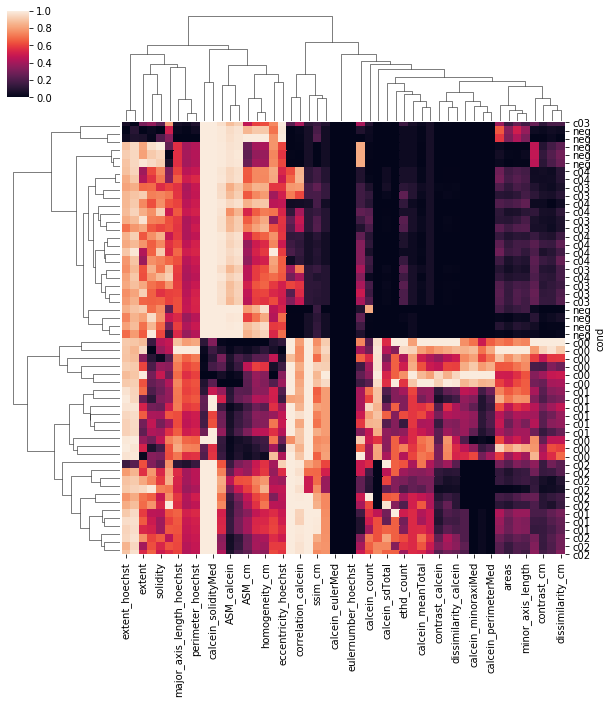

In [107]:
## visualize feature clustering v1
rcGraph = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True}
plt.rcParams.update(rcGraph)

fig=sns.clustermap(featuresScaled_df.drop(['minor_axis_length_hoechst','bbox_hoechst','cond_short'],axis=1), 
                   yticklabels= featuresScaled_df['cond_short'])

#plt.savefig('clustermap_v1_{}.png'.format(img_df['exp_num'].iloc[0][:-5]),bbox_inches="tight")

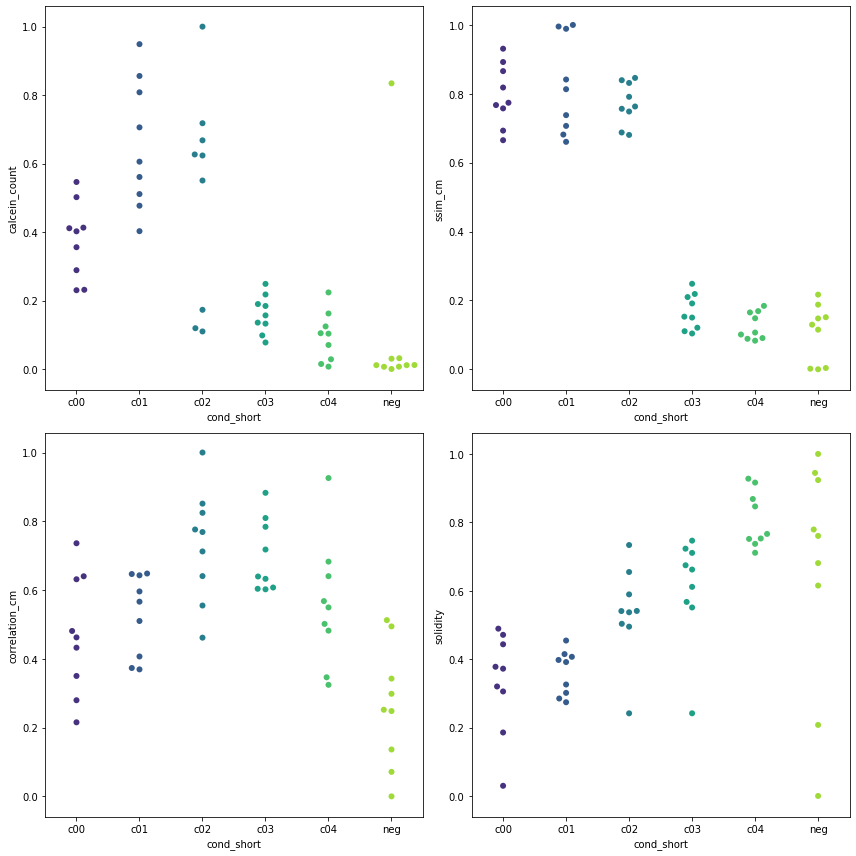

In [108]:

##visualize primary features: count, dead cell count, single cell area, solidity

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
sns.swarmplot(y="calcein_count", x="cond_short", 
                 data=featuresScaled_df,color='gray',ax=ax1,palette='viridis',size=6)
sns.swarmplot(y="ssim_cm",x="cond_short",data=featuresScaled_df, color='gray',palette='viridis',ax=ax2,size=6)
sns.swarmplot(y="correlation_cm", x="cond_short", data=featuresScaled_df,color='gray',palette='viridis',ax=ax3,size=6)
sns.swarmplot(y="solidity", x="cond_short",data=featuresScaled_df,color='gray',palette='viridis',ax=ax4,size=6)
fig.tight_layout()

In [83]:
## mean/cond for single experiment
featuresScaled_df.head()
featuresScaled_mean=featuresScaled_df.groupby('cond_short').mean()
featuresScaled_mean.to_excel('FeaturesScaled_Mean_exp{}.xlsx'.format('CaPrange01'))

In [134]:
primaryFeat_df=featuresScaled_df[['cond_short','nuclei_count','ethd_count','solidity']]
primaryFeat_df2=primaryFeat_df.reset_index()
primaryFeat_df2.drop('cond',axis=1,inplace=True)

#primaryFeat_df2.groupby('cond_short').mean().T
primaryFeat_df2

,cond_short,nuclei_count,ethd_count,solidity
0,c00,0.272908,0.029412,0.709902
1,c00,0.780876,0.029412,0.933333
2,c00,0.729084,0.029412,0.998286
3,c00,0.756972,0.029412,0.928219
4,c00,0.980080,0.000000,0.866405
5,c00,0.928287,0.029412,0.878557
6,c00,0.619522,0.000000,0.777570
7,c00,0.737052,0.000000,0.852057
8,c00,0.735060,0.058824,0.805872
9,c01,0.818725,0.029412,0.800967


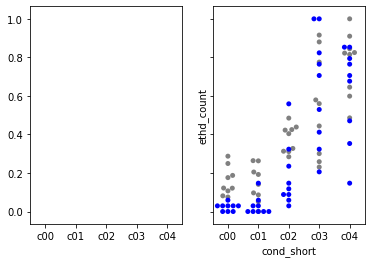

In [88]:
# Create two subplots and unpack the output array immediately


sns.swarmplot(y="ethd_count",x="cond_short",data=featuresScaled_df, ax=ax2,color='b')

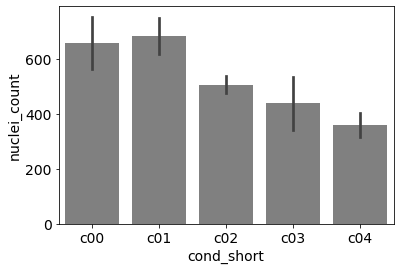

In [41]:
fig=sns.barplot(x='cond_short',y='nuclei_count',data=img_df,ci='sd',color='gray')

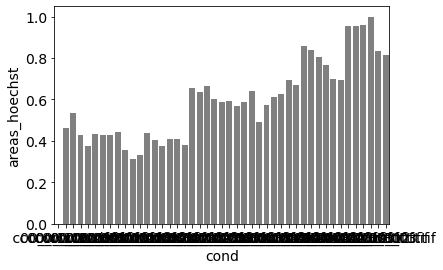

In [72]:
singleCellMedian_df['cond_short']=np.empty((len(singleCellMedian_df), 0)).tolist()
singleCellMedian_df['cond_short']=(pd.Series(singleCellMedian_df.index)).values
singleCellMedian_df['cond_short']=singleCellMedian_df['cond_short'].apply(lambda val: val[:4])


fig=sns.barplot(x=singleCellMedian_df.index,y='areas_hoechst',data=singleCellMedian_df,ci='sd',color='gray')